In [1]:
# 必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 可能であれば日本語フォントを設定
import os
try:
    if os.name == 'posix':  # Mac/Linux
        japanese_fonts = ['Hiragino Sans', 'Hiragino Kaku Gothic Pro', 'Yu Gothic', 'Meiryo']
        for font in japanese_fonts:
            try:
                plt.rcParams['font.family'] = font
                break
            except:
                continue
except:
    pass

# 図のサイズ設定
plt.rcParams['figure.figsize'] = (10, 6)

print("ライブラリのインポートが完了しました")

ライブラリのインポートが完了しました


In [2]:
# 各モデルのF値を入力
# 例: 10分割交差検証の結果を想定（各foldのF値のリスト）

# モデル1: ロジスティック回帰
model1_f1_scores = [0.8605, 0.869, 0.8511, 0.8272, 0.845, 0.8308, 0.8399, 0.8902, 0.8434, 0.8571]

# モデル2: 決定木
model2_f1_scores = [0.7961, 0.8194, 0.7651, 0.7718, 0.7855, 0.7577, 0.7774, 0.8194, 0.7987, 0.8176]

# モデル3: ランダムフォレスト
model3_f1_scores = [0.7961, 0.8194, 0.7651, 0.7718, 0.7855, 0.7577, 0.7774, 0.8194, 0.7987, 0.8026]

# モデル名のリスト
model_names = ['ロジスティック回帰', '決定木', 'ランダムフォレスト']

# 各モデルのF値のリストをまとめる
models_f1_scores = [model1_f1_scores, model2_f1_scores, model3_f1_scores]

print("モデルデータの設定が完了しました")
print(f"モデル数: {len(model_names)}")
for i, name in enumerate(model_names):
    print(f"  {name}: {len(models_f1_scores[i])}個のF値")

モデルデータの設定が完了しました
モデル数: 3
  ロジスティック回帰: 10個のF値
  決定木: 10個のF値
  ランダムフォレスト: 10個のF値


In [3]:
# 各モデルのF値の統計値を計算
def calculate_statistics(f1_scores):
    """
    F値のリストから統計値を計算
    
    Args:
        f1_scores: F値のリスト
    
    Returns:
        dict: 統計値（平均、最小値、最大値、標準偏差）
    """
    f1_array = np.array(f1_scores)
    return {
        'mean': np.mean(f1_array),
        'min': np.min(f1_array),
        'max': np.max(f1_array),
        'std': np.std(f1_array)
    }

# 各モデルの統計値を計算
model_statistics = []
for i, f1_scores in enumerate(models_f1_scores):
    stats = calculate_statistics(f1_scores)
    model_statistics.append(stats)
    print(f"\n【{model_names[i]}】")
    print(f"  平均: {stats['mean']:.4f}")
    print(f"  最小値: {stats['min']:.4f}")
    print(f"  最大値: {stats['max']:.4f}")
    print(f"  標準偏差: {stats['std']:.4f}")


【ロジスティック回帰】
  平均: 0.8514
  最小値: 0.8272
  最大値: 0.8902
  標準偏差: 0.0178

【決定木】
  平均: 0.7909
  最小値: 0.7577
  最大値: 0.8194
  標準偏差: 0.0218

【ランダムフォレスト】
  平均: 0.7894
  最小値: 0.7577
  最大値: 0.8194
  標準偏差: 0.0204


/var/folders/ys/vftz7rxd7x3bwtxbwg0llgpc0000gn/T/ipykernel_26095/1829285464.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(models_f1_scores, labels=model_names, patch_artist=True)
/var/folders/ys/vftz7rxd7x3bwtxbwg0llgpc0000gn/T/ipykernel_26095/1829285464.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


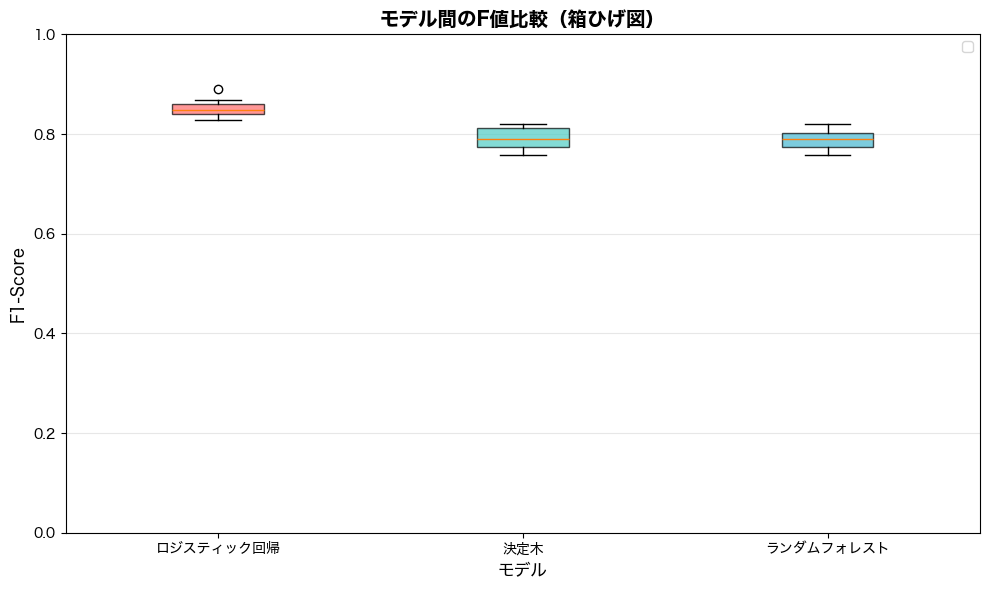

In [4]:
# 箱ひげ図でモデル間のF値を比較
fig, ax = plt.subplots(figsize=(10, 6))

# 箱ひげ図を作成
bp = ax.boxplot(models_f1_scores, labels=model_names, patch_artist=True)

# 箱の色を設定（各モデルに異なる色を割り当て）
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFE66D', '#A8E6CF']
for patch, color in zip(bp['boxes'], colors[:len(model_names)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# グラフの設定
ax.set_title('モデル間のF値比較（箱ひげ図）', fontsize=14, fontweight='bold')
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_xlabel('モデル', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1])

plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# 統計値の比較表を表示
print("="*70)
print("【各モデルのF値統計値比較】")
print("="*70)
print(f"{'モデル名':<20} {'平均':<12} {'最小値':<12} {'最大値':<12} {'標準偏差':<12}")
print("-"*70)
for i, (name, stats) in enumerate(zip(model_names, model_statistics)):
    print(f"{name:<20} {stats['mean']:<12.4f} {stats['min']:<12.4f} {stats['max']:<12.4f} {stats['std']:<12.4f}")

# 最良のモデルを判定（平均F値が最も高いモデル）
best_model_idx = np.argmax([stats['mean'] for stats in model_statistics])
print(f"\n最良のモデル（平均F値）: {model_names[best_model_idx]} (F値: {model_statistics[best_model_idx]['mean']:.4f})")

【各モデルのF値統計値比較】
モデル名                 平均           最小値          最大値          標準偏差        
----------------------------------------------------------------------
ロジスティック回帰            0.8514       0.8272       0.8902       0.0178      
決定木                  0.7909       0.7577       0.8194       0.0218      
ランダムフォレスト            0.7894       0.7577       0.8194       0.0204      

最良のモデル（平均F値）: ロジスティック回帰 (F値: 0.8514)
